In [5]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
plt.style.use("dark_background")

# Optimización

<div style="text-align: justify; font-size: 1.1rem;">

Las primeras preguntas que surgen en relación a este tema y el mundo de Machine Learning son:
* ¿Qué es optimizar?
* ¿Cómo encontrar el óptimo matemática y computacionalmente?

Los conceptos centrales a ver para entender esto son: **Optimización, Métodos iterativos (gradiente descendiente) y convexidad**
</div>

## Optimización

<div style="text-align: justify; font-size: 1.1rem;">

Optimizar básicamente es buscar la manera de realizar algo más eficientemente (ahorrar tiempo, dinero, esfuerzo, etc), y lo hacemos cotidianamente, a vaces conscientemente y otras de manera más arbitraria. Siempre estamos maximizando o minimizando algo para optimizar.

Por ejemplo: tomar el colectivo que nos lleva más rápido del punto A al punto B.

Toda optimización incluye:
* Tomar una **decisión**, que vive en un **Espacio de Decisión**. Ejemplo: elegir la línea de colectivo más adecuada para lo que pretendemos hacer (llegar más rápido de A a B)
* Definir en qué nos basamos para **justificar/guiar** nuestra elección de ese óptimo, tenemos una **Función de Costo/Recompensa** también llamada **Función Objetivo** (como una función matemática cuyo resultado nos permitirá justificar que la decisión 1 o decisión 2 es la más adecuada). Ejemplo: tomar este colectivo de esta línea porque el tiempo de viaje es menor
* Usamos algún **método** para que la elección de la opción final sea la óptima según la métrica elegida. Por ejemplo: usamos Google Maps para usar como guía o referencia para finalmente estar seguros de la elección de esa línea de colectivos.

En resumen, tenemos entonces tres partes en la optimización para hacer algo de manera eficiente:
* ¿Qué decido hacer para optimiar esa tarea?
* ¿Por qué tomo esa decisión en particular? ¿Cuál es la función costo/beneficio?
* ¿Qué uso como referencia para tomar esa decisión?
</div>

### Espacio de Decisión

<div style="text-align: justify; font-size: 1.1rem;">

El objetivo de optimizar es, como dijimos, encontrar la solución más óptima/eficiente para concretar una tarea. Esa decisión que tomamos debemos pensarla como la mejor alternativa u opción que tomamos y que forma parte de un espacio de decisión. Por ejemplo, el conjunto de posibles líneas de colectivos a tomar para llegar más rápido del punto A al punto B sería un espacio de decisión.

Si nuestro valor óptimo (decisión que tomamos) es $\color{orange}{x^*}$ (x chiquita estrella) decimos que 

$$
\color{orange}{x^* \in \mathbf{X} \quad \mathbf{X} \subseteq \mathbb{R^n}}
$$

donde $\color{orange}{\mathbf{X}}$ (X grande) es nuestro espacio de decisión. Este, puede estar contenido o ser igual a un espacio como ser $\color{orange}{\mathbf{R^n}}$. Notese que $\color{orange}{\mathbf{R^n}}$ es un ejemplo, puede ser cualquier otro conjunto de posibles decisiones. 

Los espacio de decisión pueden ser conjuntos discretos y finitos (como la cantidad de líneas de colectivos), o bien continuos. Ejemplo de esto útlimo puede ser las posibilidades de rango de tiempo que tengo para elegir para estudiar un tema (hasta que me decante por una opción, que será mi decisión final, por ej, elijo estudiar este tema 1/2hs).

</div>

### Función Costo/Recompensa o Función Objetivo

<div style="text-align: justify; font-size: 1.1rem;">

Las funciones que queremos optimizar pueden ser definidas de manera sencilla o necesitar de un proceso de modelado, seguramente definido a través de una función (una función matemática). Esto es lo que utilizaremos como métrica para evaluar cuán bien o cuán mal estamos al momento de tomar la decisión. 
Definir bien una función de costo es importantísimo a la hora de optimizar, porque a fin de cuentas, estamos optimizando contra un modelo de lo que consideramos costo o recompensa. Depende qué elijamos, el valor óptimo será distinto, ya que un valor óptimo para una función puede ser subóptimo para otra.

Definamos por ejemplo la función de recompensa *educativa* (recompensa de un concepto bien aprendido al estudiar) por las horas estudiadas, o que se dará en función de las horas estudiadas. Por ejemplo:

$$
\color{orange}{f(x)=-(x-3)^2 + 8}
$$

(son arbitrarios los números usados, fueron elegidos solamente para poder obtener una función recompensa positiva con valores de tiempo positivo)
</div>

In [2]:
x_r = np.linspace(start=-4,stop=10,num=100)

def reward(x):
    return -(x-3)**2 + 8

y_r = reward(x_r)

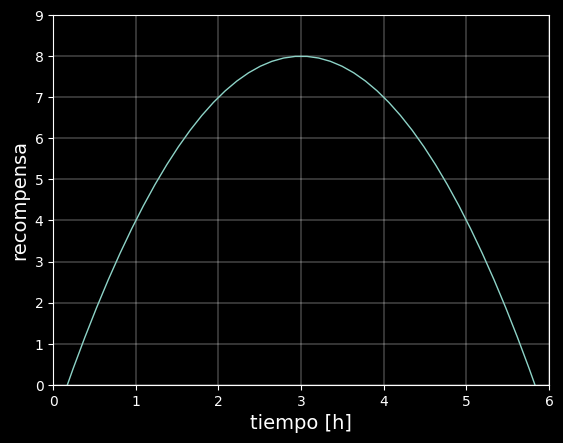

In [4]:
# fig = plt.figure(figsize=(12,5))
plt.plot(x_r,y_r,linewidth=1)
plt.grid(linewidth=0.3)
plt.xlabel("tiempo [h]", fontsize=14)
plt.ylabel("recompensa", fontsize=14)
plt.xlim(0, 6)
plt.ylim(0, 9)
plt.show()

<div style="text-align: justify; font-size: 1.1rem;">

Esta función es interesante porque al ser continua nos permite darnos cuenta de lo siguiente:

- a medida que el tiempo de estudio incrementa aumenta la recompensa
- el valor del tiempo de estudio vale más en las primeras horas
- hay un punto justo de máxima verdad, máxima sabiduría 
- si agregamos más horas solamente me termino quemando y es contraproducente.

Nosotros queremos maximizar la recompensa, y haciendo eso tendremos un valor de tiempo que deberíamos estudiar si este modelo realmente funcionase. Este valor óptimo es el más importante ya que es el que va a guiar nuestra decisión final. 
Entonces:

$$
\color{orange}{x_{\text{óptimo}} = x^{*}}
$$

donde 

$$
\color{orange}{x^{*} = \underset{x}{\arg\max} \ f(x)}
$$

esto se lee de la siguiente forma: $\color{orange}{{x ^*}}$ es el valor de $\color{orange}{x}$ que maximiza el valor de $\color{orange}{f(x)}$. Aquí $\color{orange}{\arg}$ lo que señala es que estamos buscando el valor de timepo que maximiza la recompensa.

Si nos interesara encontrar el valor máximo de recompensa $r$ deberíamos escribirlo de la siguiente forma

$$
\color{orange}{r = \max \ f(x)}
$$

generalmente los valores propios de ese maximo no nos importan mucho, es el argumento que maximiza la función de costo lo que buscamos. 

En el ejemplo del gráfico de la recompensa educativa obtenida según el tiempo que se usa para estudiar hallamos a simple vista que el valor de $\color{orange}{{x ^*}}$ (o sea, el valor de $x$ donde $f(x)$ alcanza su máximo su óptimo) es $x = 3$.
</div>

### Hallando el óptimo

<div style="text-align: justify; font-size: 1.1rem;">

Para continuar con el ejemplo de la recompensa óptima según la cantidad de tiempo invertido para estudiar, hallaremos el óptimo de esta función con un método determinista para luego dar pie a los métodos iterativos. 

La derivada es lo que nos permite entender cómo varía una función de acuerdo a el o los valores de entrada. Recordemos que en funciones de un valor de entrada y un valor de salida, la derivada gráficamente representa la pendiente d ela recta tangente. En los máximos o mínimos las variaciones son nulas (la pendiente de la recta tangente es cero). 

<br>

<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTjv3rEPpJeMu4at-UZz6hC6U94tSEac6k_8g&usqp=CAU" height=300 width=300></center>

Entonces esto indica que si derivamos e igualamos a cero podríamos encontrar el valor de x que maximiza la recompensa. Calculamos la derivada de la función modelo que usamos

$$
\color{orange}{f'(x) = -2(x-3)}
$$

$$
\color{orange}{-2(x-3)=0 \ \implies \ x=3}
$$

</div>

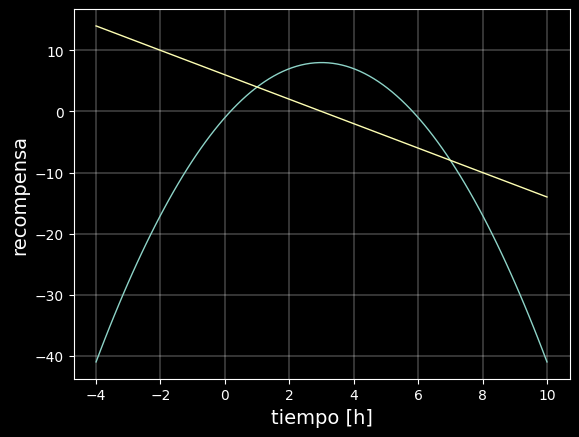

In [15]:
# Ejemplo practicando con Sympy:
f, x = sp.symbols('f, x') 
f = -(x-3)**2 + 8

deriv_f = sp.diff(f) 

f_for_numpy = sp.lambdify(x, f, "numpy")
y_r = f_for_numpy(x_r)

deriv_f_for_numpy = sp.lambdify(x, deriv_f, "numpy")
deriv_y_r = deriv_f_for_numpy(x_r)

# Ejemplo más acotado (por ser sencilla la funcion)
# deriv_reward = lambda x: -2*(x-3)
# y_deriv = deriv_reward(x_r)

plt.plot(x_r,y_r,linewidth=1, label="recompensa, f(x)")
plt.plot(x_r,deriv_y_r, linewidth=1, label="derivada recompensa, f'(x)")
plt.xlabel("tiempo [h]", fontsize=14)
plt.ylabel("recompensa", fontsize=14)
plt.grid(linewidth=0.3)
plt.show()